ALY 6040: Data Mining Applications

Author: Pei-Yu Jheng

Dataset: IceCubed Donor Dataset

Instructor: Justin Grosz

March 10,2024

In [1]:
#Install and Import necessary libraries
import bamboolib as bam #easy to do data manipulation and highly recommend going to https://bamboolib.8080labs.com/ and that will help you follow along
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind

In [2]:
#Load Dataset
df = pd.read_excel('KickstarterData_Facts.xlsx') 
df

      Donate ID Donate Date  Gender  Deposit Amount Preferred Color of Device  \
0             1  2019-07-01  female             100                     white   
1             2  2019-07-01  female             100                      blue   
2             3  2019-07-01  female             100                    silver   
3             4  2019-07-01  female             100                    silver   
4             5  2019-07-01    male             100                     white   
...         ...         ...     ...             ...                       ...   
9995       9996  2019-07-09    male             100                     black   
9996       9997  2019-07-09    male             100                    silver   
9997       9998  2019-07-09    male               0                      blue   
9998       9999  2019-07-09    male               0                      blue   
9999      10000  2019-07-09    male               1                     black   

      Ice Cream Products Co

# Data Cleaning

### 1. Display summary statistics and data types

In [3]:
# Display the statistical summary
df.describe()

         Donate ID  Deposit Amount  Ice Cream Products Consumed Per Week  \
count  10000.00000    10000.000000                          10000.000000   
mean    5000.50000      139.515800                              4.962300   
std     2886.89568       80.483091                              3.165293   
min        1.00000        0.000000                              0.000000   
25%     2500.75000      100.000000                              2.000000   
50%     5000.50000      100.000000                              5.000000   
75%     7500.25000      119.000000                              8.000000   
max    10000.00000      400.000000                             10.000000   

       How many desserts do you eat a week     Purchased  
count                         10000.000000  10000.000000  
mean                              6.686800      0.651300  
std                               2.460592      0.476583  
min                               0.000000      0.000000  
25%                 

### Summary statistics of numerical variables

In [4]:
# Summary statistics
summary_stats = df.groupby("Purchased").describe()
print(summary_stats)


          Donate ID                                                         \
              count         mean          std  min     25%     50%     75%   
Purchased                                                                    
0            3487.0  5074.682248  2813.996269  1.0  2970.5  4879.0  7409.0   
1            6513.0  4960.783510  2924.619020  2.0  2171.0  5083.0  7518.0   

                   Deposit Amount              ...  \
               max          count        mean  ...   
Purchased                                      ...   
0          10000.0         3487.0  118.107256  ...   
1           9996.0         6513.0  150.977737  ...   

          Ice Cream Products Consumed Per Week        \
                                           75%   max   
Purchased                                              
0                                          6.0  10.0   
1                                          8.0  10.0   

          How many desserts do you eat a week            

### Summary statistics of categorical variables

In [5]:
# Categorical variables
cat_vars = ["Gender", "Preferred Color of Device", "Favorite Flavor Of Ice Cream", "Donated To Kick Starter Before", "Household Income", "Do you own a Keurig"]
for var in cat_vars:
    freq_table = df.groupby(["Purchased", var]).size().unstack()
    print(freq_table)


Gender     female  male
Purchased              
0            1503  1984
1            3223  3290
Preferred Color of Device  black  blue  no preference   red  silver  white
Purchased                                                                 
0                            408   445           1331   427     445    431
1                           1203  1246            323  1263    1261   1217
Favorite Flavor Of Ice Cream  chocolate  no preference  specialty  swirl  \
Purchased                                                                  
0                                   338           1168        682    685   
1                                  1620            859       1260   1382   

Favorite Flavor Of Ice Cream  vanilla  
Purchased                              
0                                 614  
1                                1392  
Donated To Kick Starter Before    no   yes
Purchased                                 
0                               1297  2190
1         

Through above summary statistics, we found no outliners in this dataset.

In [6]:
print("The datatype of each column:")
print(df.dtypes)

The datatype of each column:
Donate ID                                        int64
Donate Date                             datetime64[ns]
Gender                                          object
Deposit Amount                                   int64
Preferred Color of Device                       object
Ice Cream Products Consumed Per Week             int64
Favorite Flavor Of Ice Cream                    object
Donated To Kick Starter Before                  object
Household Income                                object
Do you own a Keurig                             object
How many desserts do you eat a week              int64
Purchased                                        int64
dtype: object


### 2. Checking the Missing Value

In [7]:
#Find the missing value in each column
missing_values = df.isna().sum()
print("Missing values in each column:")
print(missing_values)

#Find the Number of rows in the dataset
num_rows = df.shape[0]
print("Number of rows in the dataset:", num_rows)

Missing values in each column:
Donate ID                               0
Donate Date                             0
Gender                                  0
Deposit Amount                          0
Preferred Color of Device               0
Ice Cream Products Consumed Per Week    0
Favorite Flavor Of Ice Cream            0
Donated To Kick Starter Before          0
Household Income                        0
Do you own a Keurig                     0
How many desserts do you eat a week     0
Purchased                               0
dtype: int64
Number of rows in the dataset: 10000


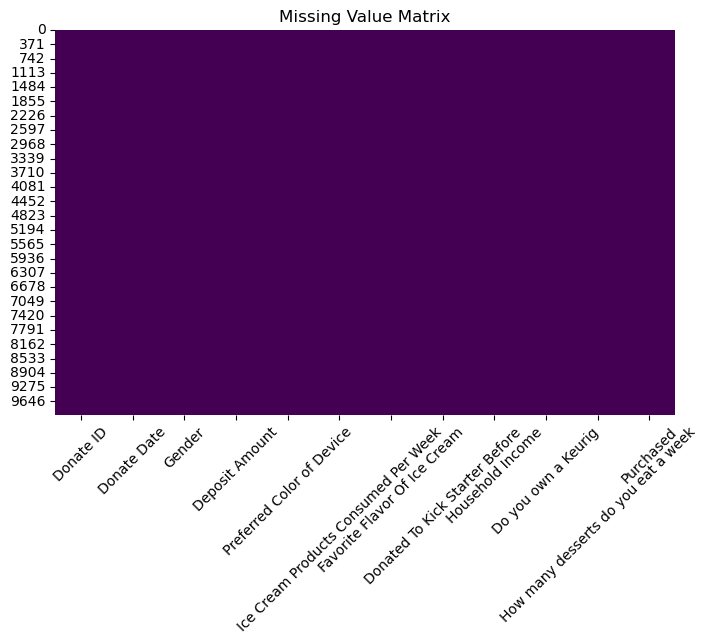

In [8]:
# Create a boolean DataFrame indicating missing values
missing_values_matrix = df.isnull()

# Plot the missing value matrix as a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(missing_values_matrix, cbar=False, cmap='viridis')
plt.title('Missing Value Matrix')
plt.xticks(rotation=45)
plt.show()

### 3. Check Duplicate Values

In [9]:
#check duplicate values
df.duplicated().sum()

0

### 4. Drop irrelevant features

In [10]:
df.drop('Donate ID', axis=1, inplace=True)
df.drop('Donate Date', axis=1, inplace=True)
df.describe()

       Deposit Amount  Ice Cream Products Consumed Per Week  \
count    10000.000000                          10000.000000   
mean       139.515800                              4.962300   
std         80.483091                              3.165293   
min          0.000000                              0.000000   
25%        100.000000                              2.000000   
50%        100.000000                              5.000000   
75%        119.000000                              8.000000   
max        400.000000                             10.000000   

       How many desserts do you eat a week     Purchased  
count                         10000.000000  10000.000000  
mean                              6.686800      0.651300  
std                               2.460592      0.476583  
min                               0.000000      0.000000  
25%                               5.000000      0.000000  
50%                               7.000000      1.000000  
75%                

### 5. Feature engineer 2 new variables

In [11]:
# Feature Engineering
# Create new variables: Desserts Consumed (without ice cream consumed) and Interaction Desserts and Income
df['Desserts Consumed'] = df['How many desserts do you eat a week'] - df['Ice Cream Products Consumed Per Week']
df.describe()

       Deposit Amount  Ice Cream Products Consumed Per Week  \
count    10000.000000                          10000.000000   
mean       139.515800                              4.962300   
std         80.483091                              3.165293   
min          0.000000                              0.000000   
25%        100.000000                              2.000000   
50%        100.000000                              5.000000   
75%        119.000000                              8.000000   
max        400.000000                             10.000000   

       How many desserts do you eat a week     Purchased  Desserts Consumed  
count                         10000.000000  10000.000000        10000.00000  
mean                              6.686800      0.651300            1.72450  
std                               2.460592      0.476583            2.42198  
min                               0.000000      0.000000            0.00000  
25%                               5.000000

In [12]:
income_mapping = {'Not Reported': 1, '<50K': 2, '<100K': 3, '>100K': 4}
df['Income Level'] = df['Household Income'].map(income_mapping)
df['Interaction Desserts and Income'] = df['How many desserts do you eat a week'] * df['Income Level']
df.drop('Income Level', axis=1, inplace=True)

df.describe()

       Deposit Amount  Ice Cream Products Consumed Per Week  \
count    10000.000000                          10000.000000   
mean       139.515800                              4.962300   
std         80.483091                              3.165293   
min          0.000000                              0.000000   
25%        100.000000                              2.000000   
50%        100.000000                              5.000000   
75%        119.000000                              8.000000   
max        400.000000                             10.000000   

       How many desserts do you eat a week     Purchased  Desserts Consumed  \
count                         10000.000000  10000.000000        10000.00000   
mean                              6.686800      0.651300            1.72450   
std                               2.460592      0.476583            2.42198   
min                               0.000000      0.000000            0.00000   
25%                               5.0

# EDA

### Distribution of Purchases

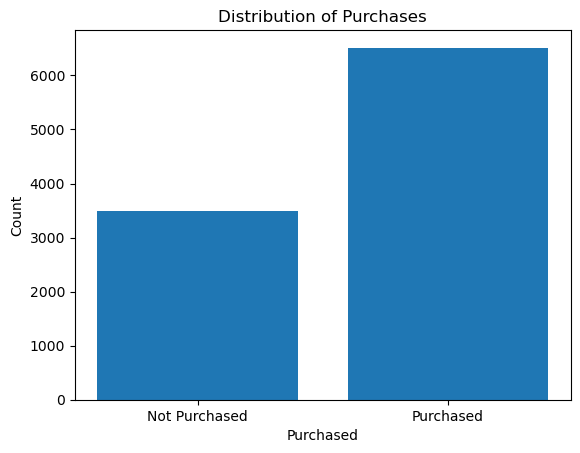

In [13]:
# Count of purchases vs. non-purchases
purchase_counts = df["Purchased"].value_counts()

# Create a bar plot
plt.bar(purchase_counts.index, purchase_counts.values)
plt.xlabel("Purchased")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Purchased", "Purchased"])
plt.title("Distribution of Purchases")
plt.show()

### Distribution of numerical variables

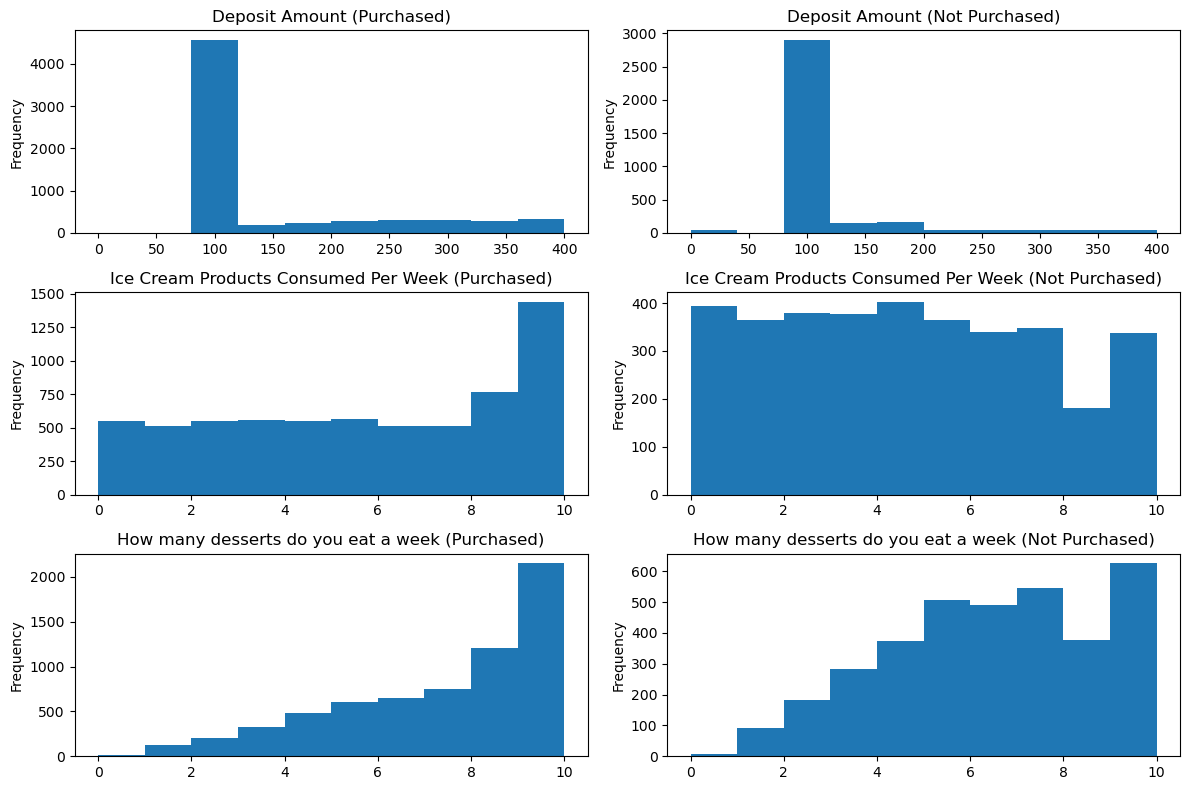

In [14]:
# Distribution of numerical variables
import matplotlib.pyplot as plt

numerical_vars = ["Deposit Amount", "Ice Cream Products Consumed Per Week", "How many desserts do you eat a week"]

fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(12, 8))
for i, var in enumerate(numerical_vars):
    df[df["Purchased"] == 1][var].plot(kind="hist", ax=axes[i, 0], title=f"{var} (Purchased)")
    df[df["Purchased"] == 0][var].plot(kind="hist", ax=axes[i, 1], title=f"{var} (Not Purchased)")

plt.tight_layout()
plt.show()


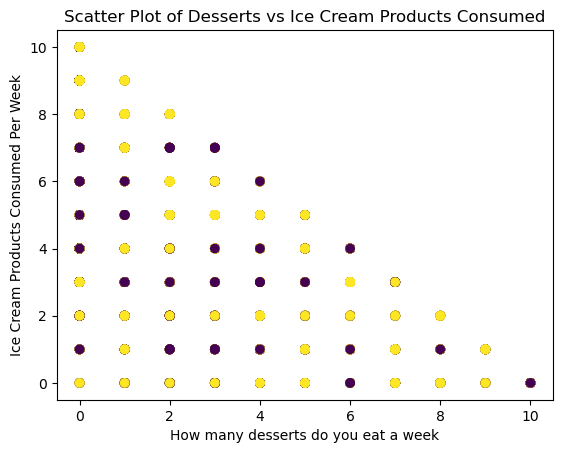

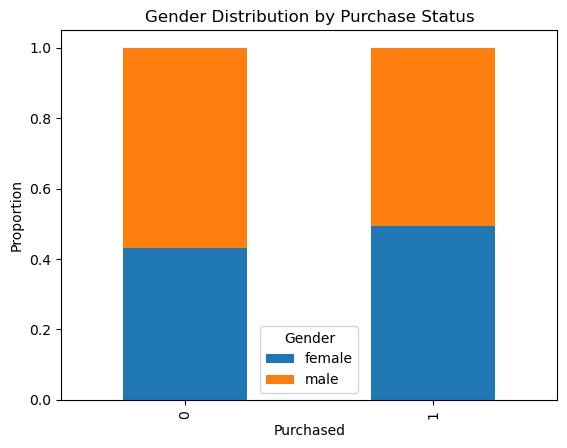

In [15]:
# Scatter plot
plt.scatter(df["Desserts Consumed"], df["Ice Cream Products Consumed Per Week"], c=df["Purchased"])
plt.xlabel("How many desserts do you eat a week")
plt.ylabel("Ice Cream Products Consumed Per Week")
plt.title("Scatter Plot of Desserts vs Ice Cream Products Consumed")
plt.show()

# Grouped bar chart
grouped_bar = df.groupby("Purchased")["Gender"].value_counts(normalize=True).unstack().plot(kind="bar", stacked=True)
plt.ylabel("Proportion")
plt.title("Gender Distribution by Purchase Status")
plt.show()


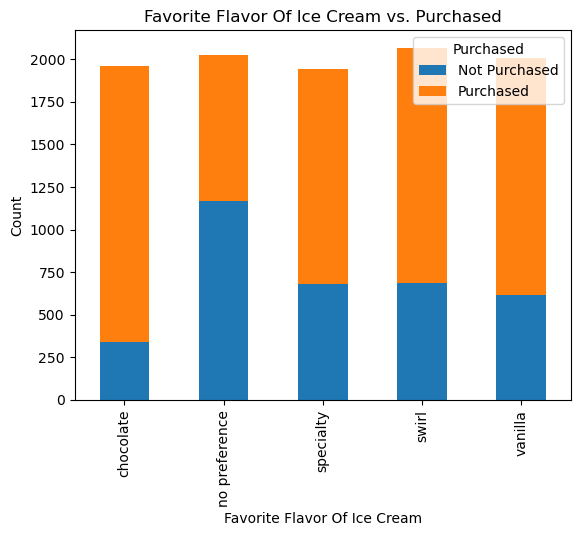

In [16]:
# Create a cross-tabulation of Preferred Color of Device and Purchased
cross_tab = pd.crosstab(df["Favorite Flavor Of Ice Cream"], df["Purchased"])

# Plot the grouped bar chart
cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("Favorite Flavor Of Ice Cream")
plt.ylabel("Count")
plt.title("Favorite Flavor Of Ice Cream vs. Purchased")
plt.legend(title="Purchased", labels=["Not Purchased", "Purchased"])
plt.show()

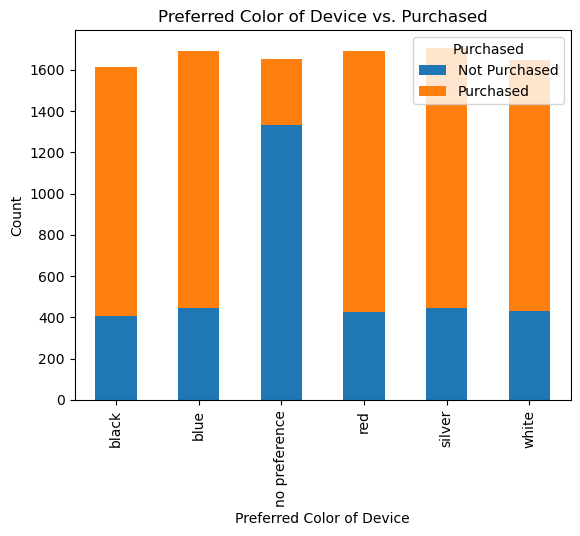

In [17]:
# Create a cross-tabulation of Preferred Color of Device and Purchased
cross_tab = pd.crosstab(df["Preferred Color of Device"], df["Purchased"])

# Plot the grouped bar chart
cross_tab.plot(kind="bar", stacked=True)
plt.xlabel("Preferred Color of Device")
plt.ylabel("Count")
plt.title("Preferred Color of Device vs. Purchased")
plt.legend(title="Purchased", labels=["Not Purchased", "Purchased"])
plt.show()

### Q1: How many percent of customers donate again? 

In [18]:
# Calculate the percentage of customers who donate again
donate_again_count = df["Donated To Kick Starter Before"].value_counts()["yes"]
total_customers = len(df)
percentage_donate_again = (donate_again_count / total_customers) * 100

print(f"Percentage of customers who donate again: {percentage_donate_again:.2f}%")


Percentage of customers who donate again: 67.56%


### Q2: Will the donor who donated increase the likelihood of buying IceCubed? (Conduct a t-test to see)

In [19]:
# Separate the data for those who own a Keurig and those who don't
donate_before = df[df["Donated To Kick Starter Before"] == "yes"]["Purchased"]
not_donate_before = df[df["Donated To Kick Starter Before"] != "yes"]["Purchased"]

# Perform the t-test
t_stat, p_value = ttest_ind(donate_before, not_donate_before)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: The donor when donate again increases the likelihood of buying IceCubed.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of buying IceCubed based on donate again or not.")


T-statistic: 7.452246980271485
P-value: 9.936521588771964e-14
Reject the null hypothesis: The donor when donate again increases the likelihood of buying IceCubed.


### Q3: If owning a Keurig increases the likelihood of buying IceCubed? (Conduct a t-test to see)

In [20]:
# Separate the data for those who own a Keurig and those who don't
own_keurig = df[df["Do you own a Keurig"] == "yes"]["Purchased"]
not_own_keurig = df[df["Do you own a Keurig"] != "yes"]["Purchased"]

# Perform the t-test
t_stat, p_value = ttest_ind(own_keurig, not_own_keurig)

print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: Owning a Keurig increases the likelihood of buying IceCubed.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of buying IceCubed based on owning a Keurig.")


T-statistic: -4.961625056235539
P-value: 7.105747260186625e-07
Reject the null hypothesis: Owning a Keurig increases the likelihood of buying IceCubed.


### Q4: Did the consumption  of dessert increase the likelihood of buying IceCubed? (Conduct a t-test to see)

In [21]:
# Separate the data for purchasers and non-purchasers
eat_more_desserts = df[df["How many desserts do you eat a week"] > 5]["Purchased"]
eat_less_desserts = df[df["How many desserts do you eat a week"] <= 5]["Purchased"]

# Perform the t-test
t_stat, p_value = ttest_ind(eat_more_desserts, eat_less_desserts)

# Print the results
print("T-statistic:", t_stat)
print("P-value:", p_value)

if p_value < 0.05:
    print("Reject the null hypothesis: The people ate more than 5 dessert a week increasing the likelihood of buying IceCubed. ")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the likelihood of buying IceCubed based on how many dessert eaten per week.")


T-statistic: 15.016835092527739
P-value: 2.0160360175613605e-50
Reject the null hypothesis: The people ate more than 5 dessert a week increasing the likelihood of buying IceCubed. 


## Encoding Categorical Variables

In [22]:
new_df = df.copy()

# Initialize LabelEncoder
le = LabelEncoder()

# Process each column that needs to be encoded
for col in ['Gender', 'Preferred Color of Device', 'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before', 'Household Income', 'Do you own a Keurig']:
    # Ignore NaN values and only encode non-null values
    new_df[col] = new_df[col].astype(str)  # Convert to string, ensuring NaNs are handled
    new_df[col] = le.fit_transform(new_df[col])

### Correlation matrix

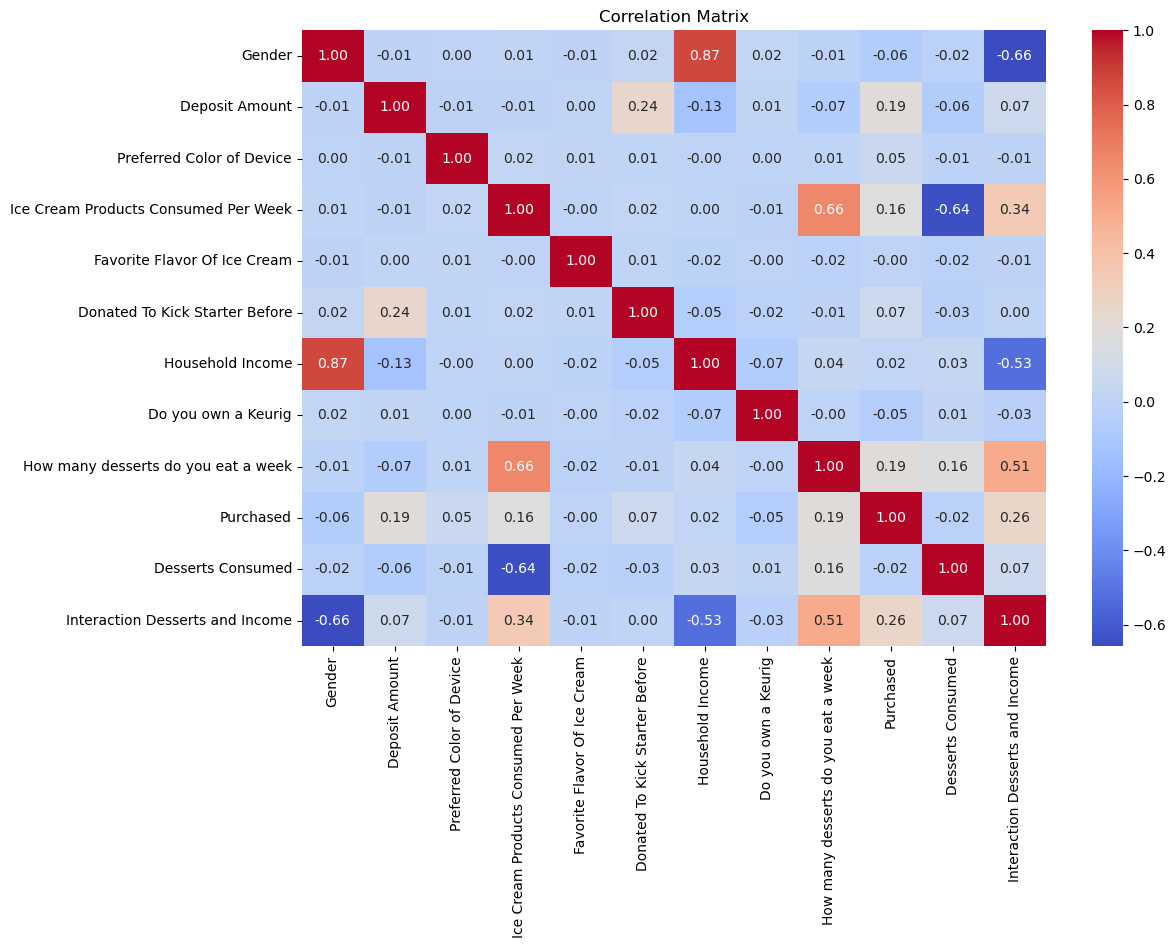

In [23]:
# Correlation matrix
corr_matrix = new_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Fit logistic regression model

In [24]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Preferred Color of Device', 'Favorite Flavor Of Ice Cream', 'Donated To Kick Starter Before', 'Household Income', 'Do you own a Keurig'])

In [25]:
# # Prepare the data, 'df' is our DataFrame with the binary variable 'Purchased' and other features
X = df_encoded.drop(['Purchased'], axis=1)  # Features
y = df_encoded['Purchased']  # Target variable

# Split the data into training and test sets, maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
model = LogisticRegression()

# Train a logistic regression model
model.fit(X_train, y_train)

# the intercept of model
model.intercept_

array([-1.02954341])

In [26]:
# the slope of model
coefficients = model.coef_
print("Coefficients:")
for i, coef in enumerate(coefficients[0]):
    print(f"  {X.columns[i]}: {coef}")


Coefficients:
  Deposit Amount: 0.013268810409999589
  Ice Cream Products Consumed Per Week: 0.08281620339547764
  How many desserts do you eat a week: 0.07072220800845963
  Desserts Consumed: -0.01209399538703553
  Interaction Desserts and Income: 0.11373414339993441
  Gender_female: -0.6057793375365821
  Gender_male: -0.41102729917885084
  Preferred Color of Device_black: 0.6827234618233209
  Preferred Color of Device_blue: 0.623751340758862
  Preferred Color of Device_no preference: -4.457945950916059
  Preferred Color of Device_red: 0.7070226664478386
  Preferred Color of Device_silver: 0.6823735352249485
  Preferred Color of Device_white: 0.7452683099448774
  Favorite Flavor Of Ice Cream_chocolate: 1.580445890948744
  Favorite Flavor Of Ice Cream_no preference: -1.965443559551502
  Favorite Flavor Of Ice Cream_specialty: -0.35245713061381206
  Favorite Flavor Of Ice Cream_swirl: -0.28419860889883924
  Favorite Flavor Of Ice Cream_vanilla: 0.0048467714005782404
  Donated To Kick St

In [27]:
import statsmodels.api as sm

# Fit logistic regression model
logit_model = sm.Logit(y_train, sm.add_constant(X_train))
result = logit_model.fit()

# Create a summary table
summary_table = result.summary()
print(summary_table)


Optimization terminated successfully.
         Current function value: 0.328048
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7980
Method:                           MLE   Df Model:                           19
Date:                Thu, 14 Mar 2024   Pseudo R-squ.:                  0.4939
Time:                        17:28:59   Log-Likelihood:                -2624.4
converged:                       True   LL-Null:                       -5185.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                      

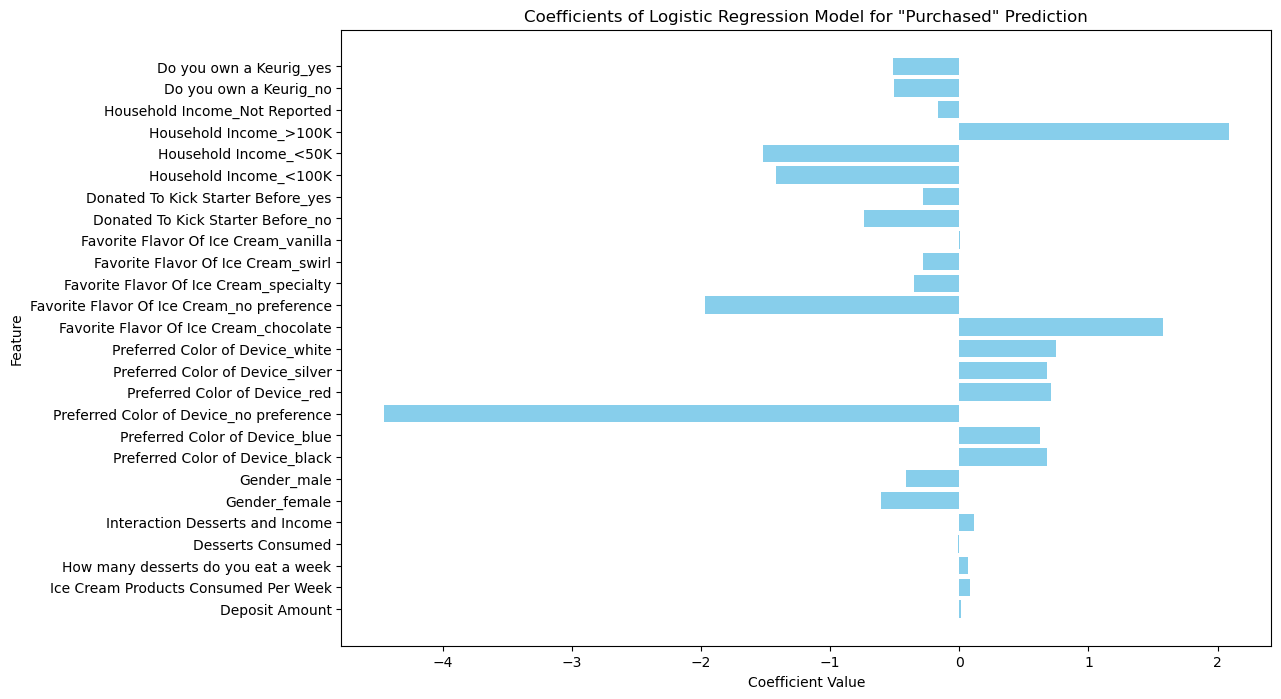

In [28]:
import matplotlib.pyplot as plt

# Coefficients and corresponding feature names
coefficients = [
    0.013268810409999589, 0.08281620339547764, 0.07072220800845963, -0.01209399538703553, 
    0.11373414339993441, -0.6057793375365821, -0.41102729917885084, 0.6827234618233209, 
    0.623751340758862, -4.457945950916059, 0.7070226664478386, 0.6823735352249485, 
    0.7452683099448774, 1.580445890948744, -1.965443559551502, -0.35245713061381206, 
    -0.28419860889883924, 0.0048467714005782404, -0.7363808311032329, -0.2804258056122943, 
    -1.4204476685349974, -1.518507168920495, 2.08821886677105, -0.1660706660313647, 
    -0.5056678481566962, -0.5111387885585602
]

feature_names = [
    'Deposit Amount', 'Ice Cream Products Consumed Per Week', 'How many desserts do you eat a week', 
    'Desserts Consumed', 'Interaction Desserts and Income', 'Gender_female', 'Gender_male', 
    'Preferred Color of Device_black', 'Preferred Color of Device_blue', 
    'Preferred Color of Device_no preference', 'Preferred Color of Device_red', 
    'Preferred Color of Device_silver', 'Preferred Color of Device_white', 
    'Favorite Flavor Of Ice Cream_chocolate', 'Favorite Flavor Of Ice Cream_no preference', 
    'Favorite Flavor Of Ice Cream_specialty', 'Favorite Flavor Of Ice Cream_swirl', 
    'Favorite Flavor Of Ice Cream_vanilla', 'Donated To Kick Starter Before_no', 
    'Donated To Kick Starter Before_yes', 'Household Income_<100K', 'Household Income_<50K', 
    'Household Income_>100K', 'Household Income_Not Reported', 'Do you own a Keurig_no', 
    'Do you own a Keurig_yes'
]

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Coefficients of Logistic Regression Model for "Purchased" Prediction')
plt.show()


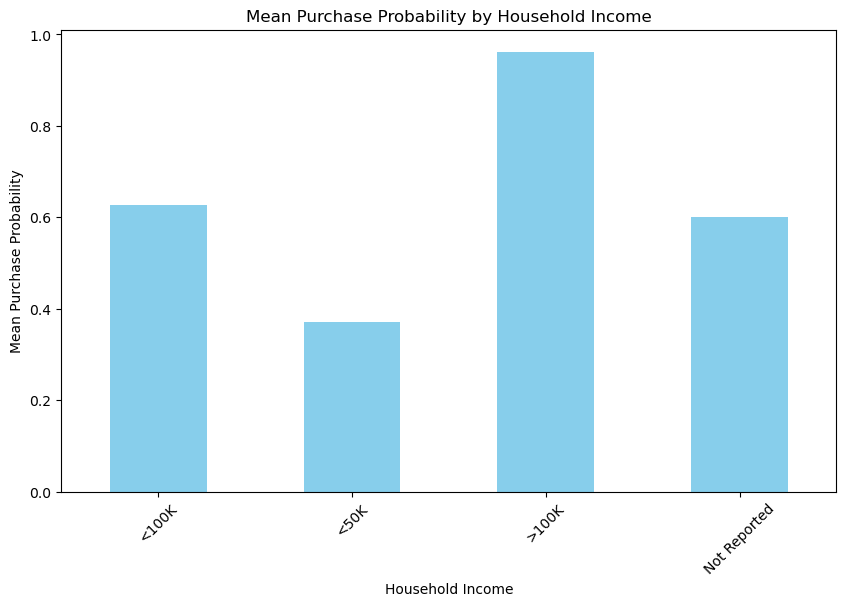

In [29]:
# Create a bar plot
plt.figure(figsize=(10, 6))
df.groupby("Household Income")["Purchased"].mean().plot(kind="bar", color="skyblue")
plt.xlabel("Household Income")
plt.ylabel("Mean Purchase Probability")
plt.title("Mean Purchase Probability by Household Income")
plt.xticks(rotation=45)
plt.show()

### Evaluate the Model

In [30]:
# Make predictions on the test data
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

#Perfromance Evaluation
train_score = accuracy_score(y_train, train_pred)*100
print("Accuracy:", train_score)

# Classification report
print("\nClassification Report of Train Set:")
print(classification_report(y_train, train_pred))

test_score = accuracy_score(y_test, test_pred)*100
print("Accuracy:", test_score)

print("\nClassification Report of Test Set:")
print(classification_report(y_test, test_pred))


Accuracy: 84.25

Classification Report of Train Set:
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      2810
           1       0.86      0.91      0.88      5190

    accuracy                           0.84      8000
   macro avg       0.83      0.81      0.82      8000
weighted avg       0.84      0.84      0.84      8000

Accuracy: 84.1

Classification Report of Test Set:
              precision    recall  f1-score   support

           0       0.80      0.71      0.75       677
           1       0.86      0.91      0.88      1323

    accuracy                           0.84      2000
   macro avg       0.83      0.81      0.82      2000
weighted avg       0.84      0.84      0.84      2000



In [31]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, test_pred)
precision = precision_score(y_test, test_pred)
recall = recall_score(y_test, test_pred)
f1 = f1_score(y_test, test_pred)
roc_auc = roc_auc_score(y_test, test_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.841
Precision: 0.8581610833927299
Recall: 0.91005291005291
F1 Score: 0.8833455612619223
ROC AUC Score: 0.8080545200190695


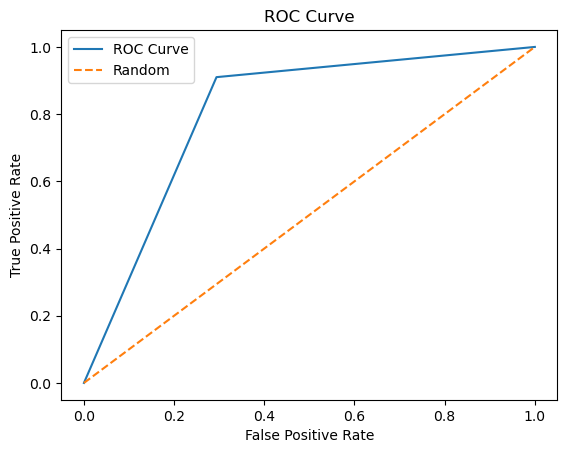

In [32]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [33]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, test_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[ 478  199]
 [ 119 1204]]


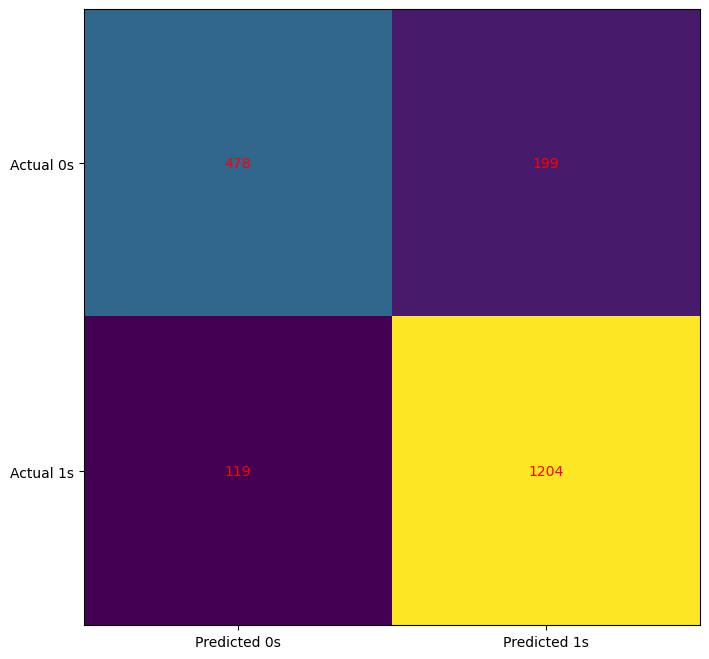

In [34]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha='center', va='center', color='red')
plt.show()

## PCA

Explained Variance Ratio: [0.14001698 0.08763916 0.08166016 0.07339303 0.06314953 0.05162488
 0.05106851 0.05085795 0.04993082 0.04890296]
Cumulative Explained Variance Ratio: [0.14001698 0.22765614 0.3093163  0.38270933 0.44585885 0.49748373
 0.54855224 0.5994102  0.64934102 0.69824397]


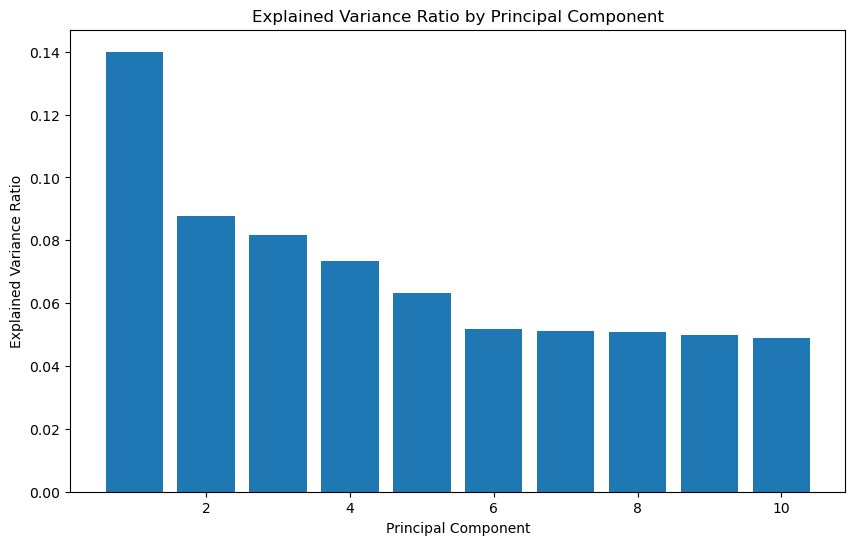

In [35]:
# Standardize the data
scaler = StandardScaler()
z = df_encoded.drop(['Desserts Consumed', 'Interaction Desserts and Income'], axis=1)
scaler.fit(z)
scaled_data = scaler.transform(z)

# Create PCA object with 10 components
pca = PCA(n_components=10)

# Perform PCA
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

# Convert the result to a DataFrame
pca_df = pd.DataFrame(data=x_pca, columns=[f'PC{i+1}' for i in range(10)])

# Print the explained variance ratio for the first 10 components
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio for the first 10 components
print("Cumulative Explained Variance Ratio:", np.cumsum(pca.explained_variance_ratio_))

# Optionally, you can visualize the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, 11), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.show()


In [36]:
pca_df

           PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     1.697901  0.578782 -1.006968  0.643328  0.982562  3.079806 -0.666615   
1     1.835111  0.015767 -0.732260 -0.062776 -0.054706  3.872749 -0.909702   
2     1.843074 -0.015462 -0.673836 -0.416920  0.307603  2.295995 -0.905707   
3     1.848091  0.037238 -0.724312 -0.081491 -0.049830  2.333018 -0.925618   
4    -0.392173  0.442699 -1.230902  1.049988  0.359355  3.090909 -0.670486   
...        ...       ...       ...       ...       ...       ...       ...   
9995 -1.916239  0.599191  3.442551 -0.140090 -1.208208 -0.240859  1.095964   
9996 -1.963321 -0.118815 -1.208964  0.970794  0.897465 -1.157010  0.793003   
9997 -1.990060  0.143954 -0.937046  0.589006 -0.313231  2.018911  0.601968   
9998 -2.126951  1.434859  3.418881  0.781924  0.451326  2.048489 -1.460145   
9999 -1.989572  0.055312 -0.820274 -0.408627  0.559801  0.508344  1.361293   

           PC8       PC9      PC10  
0    -0.530536  0.082879  

In [37]:
first_four_columns = pca_df.iloc[:, :6]
print(first_four_columns)

           PC1       PC2       PC3       PC4       PC5       PC6
0     1.697901  0.578782 -1.006968  0.643328  0.982562  3.079806
1     1.835111  0.015767 -0.732260 -0.062776 -0.054706  3.872749
2     1.843074 -0.015462 -0.673836 -0.416920  0.307603  2.295995
3     1.848091  0.037238 -0.724312 -0.081491 -0.049830  2.333018
4    -0.392173  0.442699 -1.230902  1.049988  0.359355  3.090909
...        ...       ...       ...       ...       ...       ...
9995 -1.916239  0.599191  3.442551 -0.140090 -1.208208 -0.240859
9996 -1.963321 -0.118815 -1.208964  0.970794  0.897465 -1.157010
9997 -1.990060  0.143954 -0.937046  0.589006 -0.313231  2.018911
9998 -2.126951  1.434859  3.418881  0.781924  0.451326  2.048489
9999 -1.989572  0.055312 -0.820274 -0.408627  0.559801  0.508344

[10000 rows x 6 columns]


In [38]:
z[['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']] = pca_df.iloc[:, :6]
z.head()

   Deposit Amount  Ice Cream Products Consumed Per Week  \
0             100                                     4   
1             100                                     5   
2             100                                     6   
3             100                                     5   
4             100                                     1   

   How many desserts do you eat a week  Purchased  Gender_female  Gender_male  \
0                                    7          0              1            0   
1                                    5          1              1            0   
2                                    6          1              1            0   
3                                    5          1              1            0   
4                                    7          0              0            1   

   Preferred Color of Device_black  Preferred Color of Device_blue  \
0                                0                               0   
1                 

In [39]:
# Split the data into training and test sets
X_pca = z[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']]  # Features
y_pca = z['Purchased']      # Target variable

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_pca, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred = model.predict(X_test_pca)
y_train_pred = model.predict(X_train_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train_pca, y_train_pred)
print("Accuracy of Train Set:", accuracy)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test_pca, y_pred)
print("Accuracy of Test Set:", accuracy)

print("\nClassification Report of Test Set:")
print(classification_report(y_test_pca, y_pred))


Accuracy of Train Set: 0.9855
Accuracy of Test Set: 0.9765

Classification Report of Test Set:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       677
           1       0.99      0.97      0.98      1323

    accuracy                           0.98      2000
   macro avg       0.97      0.98      0.97      2000
weighted avg       0.98      0.98      0.98      2000



Confusion Matrix:
[[ 665   12]
 [  35 1288]]


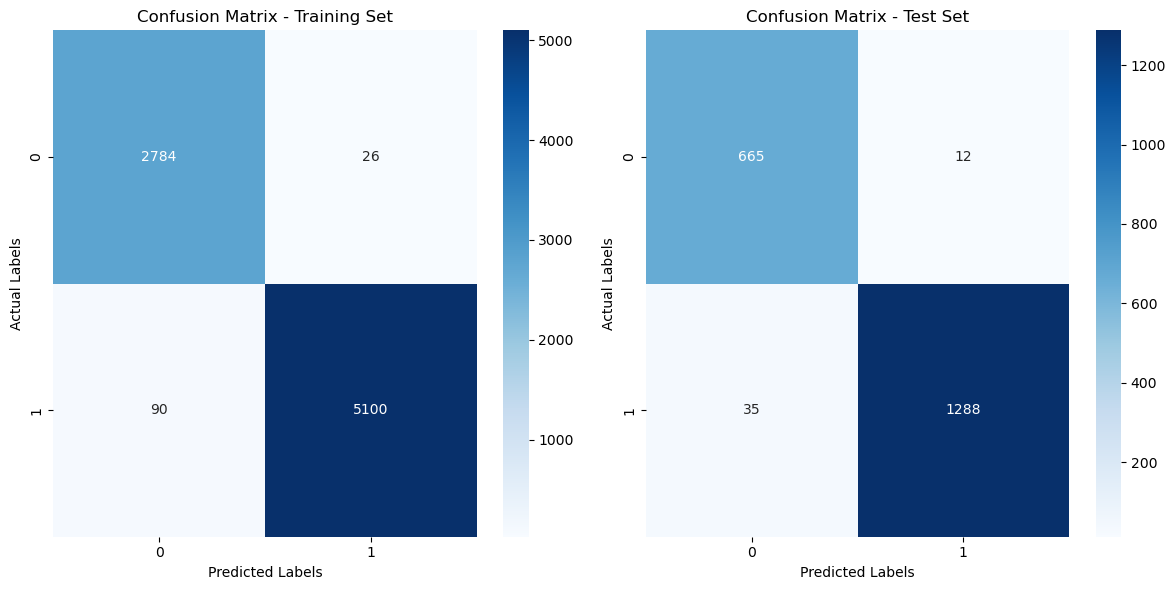

In [40]:
# Create confusion matrix for training set
conf_matrix_train = confusion_matrix(y_train_pca, y_train_pred)

# Create confusion matrix for test set
conf_matrix_test = confusion_matrix(y_test_pca, y_pred)

print("Confusion Matrix:")
print(conf_matrix_test)

# Plot confusion matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.tight_layout()
plt.show()

In [41]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test_pca, y_pred)
precision = precision_score(y_test_pca, y_pred)
recall = recall_score(y_test_pca, y_pred)
f1 = f1_score(y_test_pca, y_pred)
roc_auc = roc_auc_score(y_test_pca, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.9765
Precision: 0.9907692307692307
Recall: 0.9735449735449735
F1 Score: 0.9820815859702631
ROC AUC Score: 0.9779098575258103


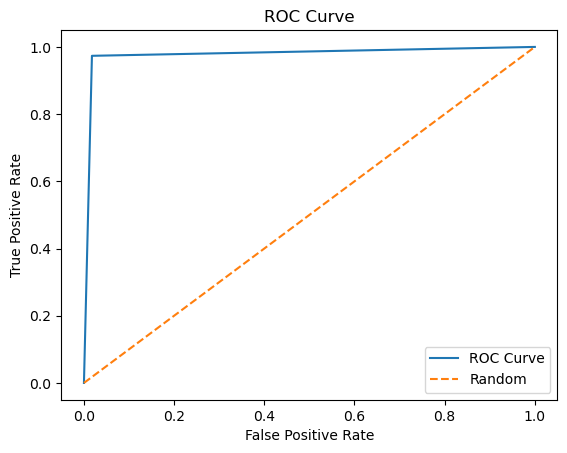

In [42]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_pca, y_pred)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## Decision Tree

Decision Tree - Training Set Accuracy: 97.375%
Decision Tree - Testing Set Accuracy: 89.9%


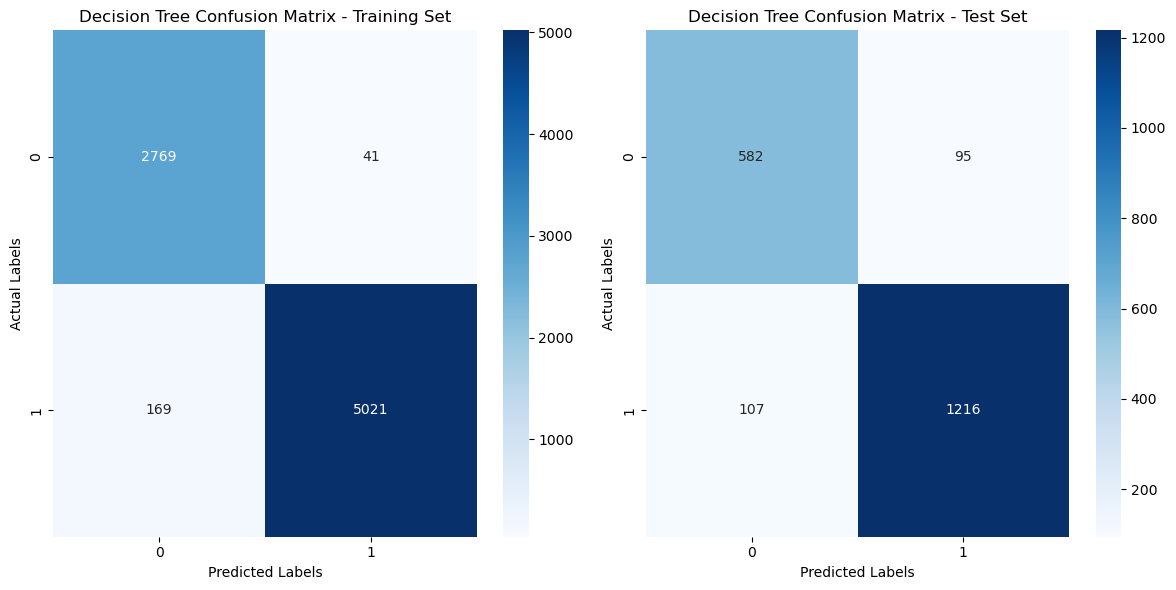

In [43]:
# # Prepare the data, 'df' is our DataFrame with the binary variable 'Purchased' and other features
X = df_encoded.drop(['Purchased'], axis=1)  # Features
y = df_encoded['Purchased']  # Target variable

# Split the data into training and test sets, maintaining class proportions
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
dt_model = DecisionTreeClassifier(random_state=88)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

# Performance evaluation
train_score_dt = accuracy_score(y_train, y_pred_train_dt) * 100
test_score_dt = accuracy_score(y_test, y_pred_test_dt) * 100

print("Decision Tree - Training Set Accuracy:", str(train_score_dt) + '%')
print("Decision Tree - Testing Set Accuracy:", str(test_score_dt) + '%')

# Confusion matrix for decision tree
conf_matrix_train_dt = confusion_matrix(y_train, y_pred_train_dt)
conf_matrix_test_dt = confusion_matrix(y_test, y_pred_test_dt)

# Plot confusion matrices for decision tree
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_train_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix - Training Set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix - Test Set")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")

plt.tight_layout()
plt.show()


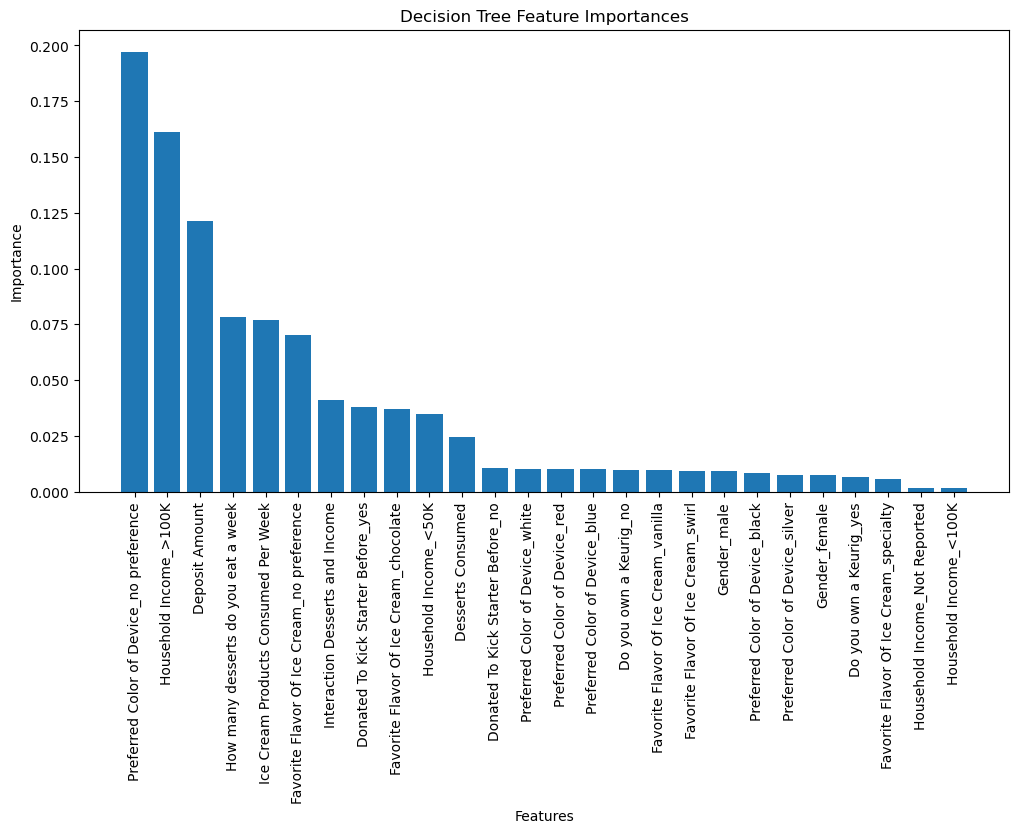

In [44]:
# Get feature importances
importances = dt_model.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Create plot
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.show()

In [45]:
names

['Preferred Color of Device_no preference',
 'Household Income_>100K',
 'Deposit Amount',
 'How many desserts do you eat a week',
 'Ice Cream Products Consumed Per Week',
 'Favorite Flavor Of Ice Cream_no preference',
 'Interaction Desserts and Income',
 'Donated To Kick Starter Before_yes',
 'Favorite Flavor Of Ice Cream_chocolate',
 'Household Income_<50K',
 'Desserts Consumed',
 'Donated To Kick Starter Before_no',
 'Preferred Color of Device_white',
 'Preferred Color of Device_red',
 'Preferred Color of Device_blue',
 'Do you own a Keurig_no',
 'Favorite Flavor Of Ice Cream_vanilla',
 'Favorite Flavor Of Ice Cream_swirl',
 'Gender_male',
 'Preferred Color of Device_black',
 'Preferred Color of Device_silver',
 'Gender_female',
 'Do you own a Keurig_yes',
 'Favorite Flavor Of Ice Cream_specialty',
 'Household Income_Not Reported',
 'Household Income_<100K']

In [46]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_test_dt)
precision = precision_score(y_test, y_pred_test_dt)
recall = recall_score(y_test, y_pred_test_dt)
f1 = f1_score(y_test, y_pred_test_dt)
roc_auc = roc_auc_score(y_test, y_pred_test_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.899
Precision: 0.927536231884058
Recall: 0.9191232048374905
F1 Score: 0.9233105542900532
ROC AUC Score: 0.889399120882556


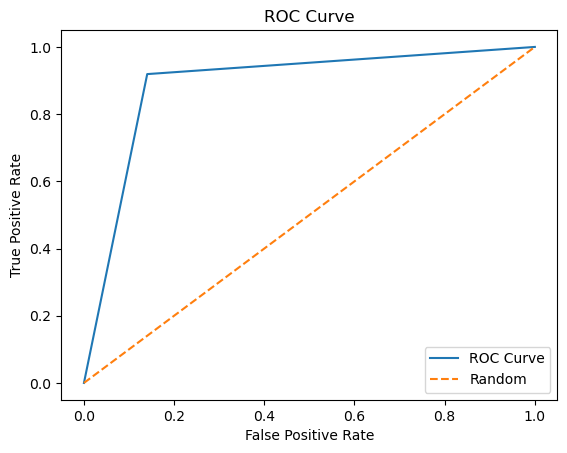

In [47]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_dt)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

                                                   Thank You So Much !!